In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00


In [ ]:
# Data Loading and Preprocessing
import pandas as pd
import re
import ipywidgets as widgets
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# Load train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Combine train and test datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Save the combined dataset to a new CSV file
combined_data.to_csv('twitter_sentiment_analysis_combined.csv', index=False)

In [ ]:
# Read combined dataset
data_path = '/content/twitter_sentiment_analysis_combined.csv'
data = pd.read_csv(data_path)

In [ ]:
# Drop rows with NaN values in the 'label' column
data = data.dropna(subset=['label'])

X = data['tweet']
y = data['label']

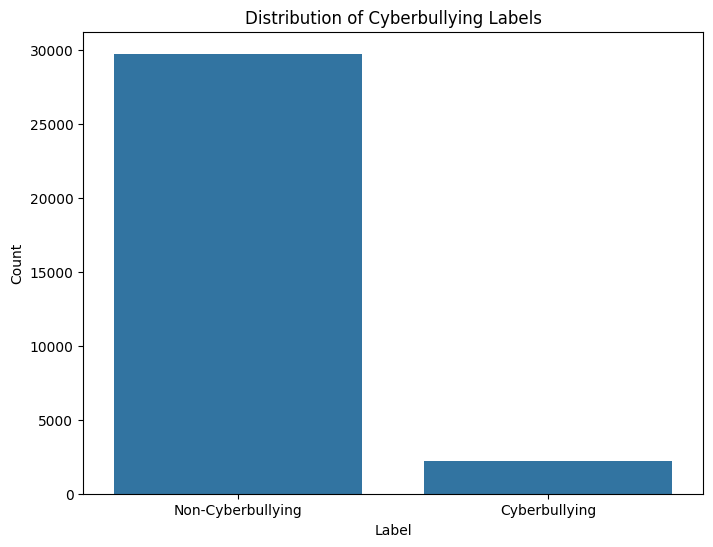

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Cyberbullying Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Cyberbullying', 'Cyberbullying'])
plt.show()

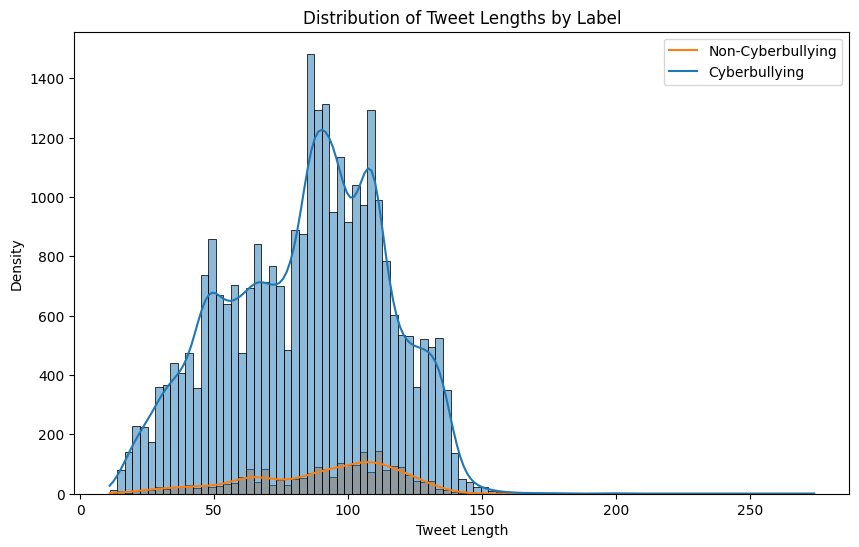

In [ ]:
# Add a column for tweet lengths
data['tweet_length'] = data['tweet'].apply(lambda x: len(x))

# Distribution of tweet lengths by label
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tweet_length', hue='label', kde=True)
plt.title('Distribution of Tweet Lengths by Label')
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.legend(['Non-Cyberbullying', 'Cyberbullying'])
plt.show()

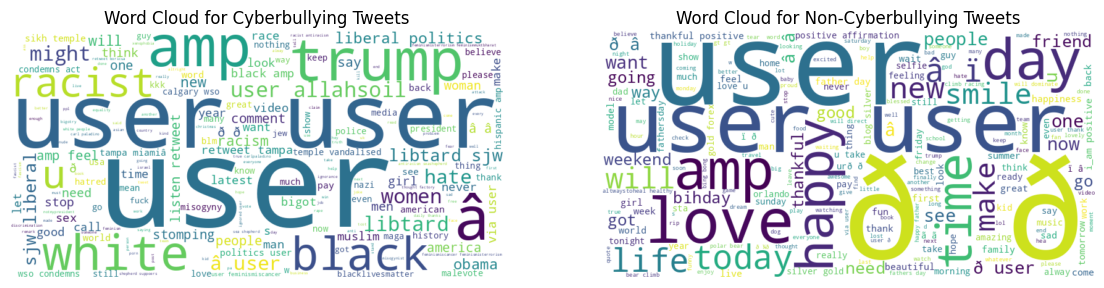

In [ ]:
# Create separate dataframes for cyberbullying and non-cyberbullying tweets
cyberbullying_tweets = data[data['label'] == 1]['tweet']
non_cyberbullying_tweets = data[data['label'] == 0]['tweet']

# Generate word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
wordcloud_cyberbullying = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cyberbullying_tweets))
plt.imshow(wordcloud_cyberbullying, interpolation='bilinear')
plt.title('Word Cloud for Cyberbullying Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_non_cyberbullying = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_cyberbullying_tweets))
plt.imshow(wordcloud_non_cyberbullying, interpolation='bilinear')
plt.title('Word Cloud for Non-Cyberbullying Tweets')
plt.axis('off')

plt.show()

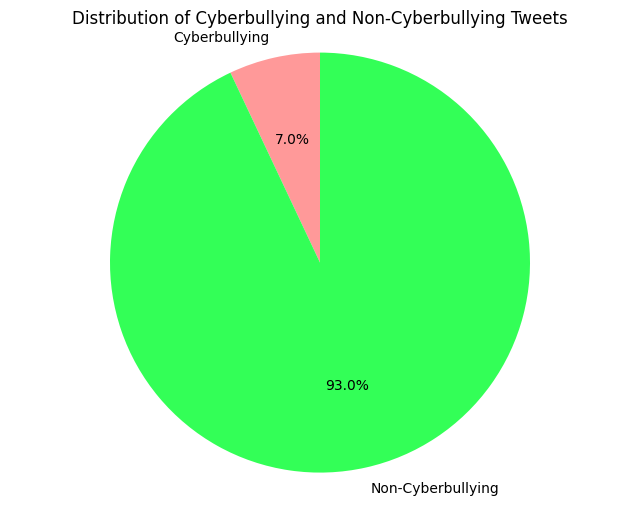

In [ ]:
# Calculate the number of cyberbullying and non-cyberbullying tweets
num_cyberbullying_tweets = data[data['label'] == 1].shape[0]
num_non_cyberbullying_tweets = data[data['label'] == 0].shape[0]

# Create labels and values for the pie chart
labels = ['Cyberbullying', 'Non-Cyberbullying']
sizes = [num_cyberbullying_tweets, num_non_cyberbullying_tweets]

# Specify colors
colors = ['#ff9999', '#33FF57']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cyberbullying and Non-Cyberbullying Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

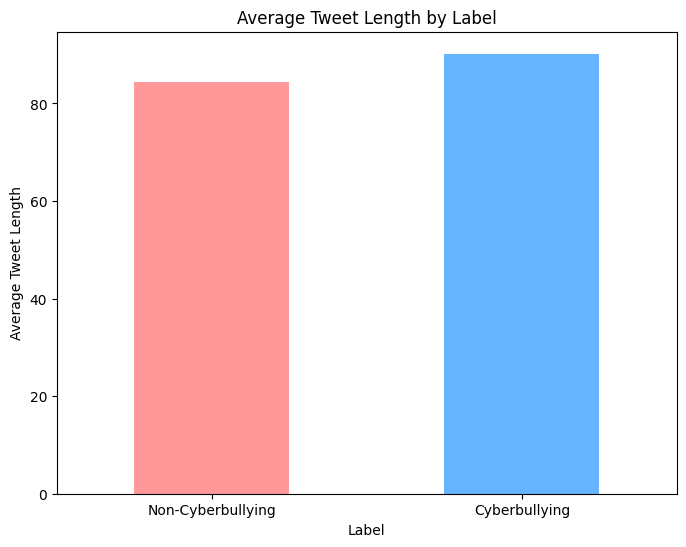

In [ ]:
# Bar plot of average tweet lengths by label
avg_tweet_length = data.groupby('label')['tweet_length'].mean()
plt.figure(figsize=(8, 6))
avg_tweet_length.plot(kind='bar', color=['#ff9999', '#66b3ff'])
plt.title('Average Tweet Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Tweet Length')
plt.xticks([0, 1], ['Non-Cyberbullying', 'Cyberbullying'], rotation=0)
plt.show()

<ipython-input-11-1ae832849003>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='tweet_length', data=data, palette=['#ff9999', '#66b3ff'])


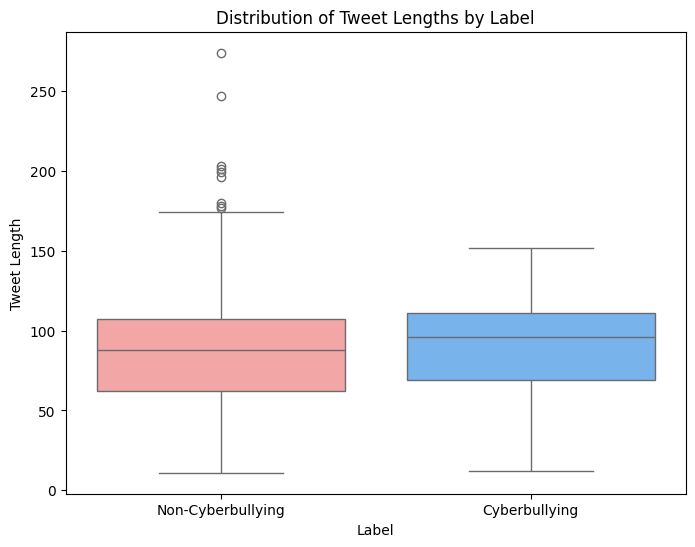

In [ ]:
# Box plot of tweet lengths by label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='tweet_length', data=data, palette=['#ff9999', '#66b3ff'])
plt.title('Distribution of Tweet Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Tweet Length')
plt.xticks([0, 1], ['Non-Cyberbullying', 'Cyberbullying'])
plt.show()

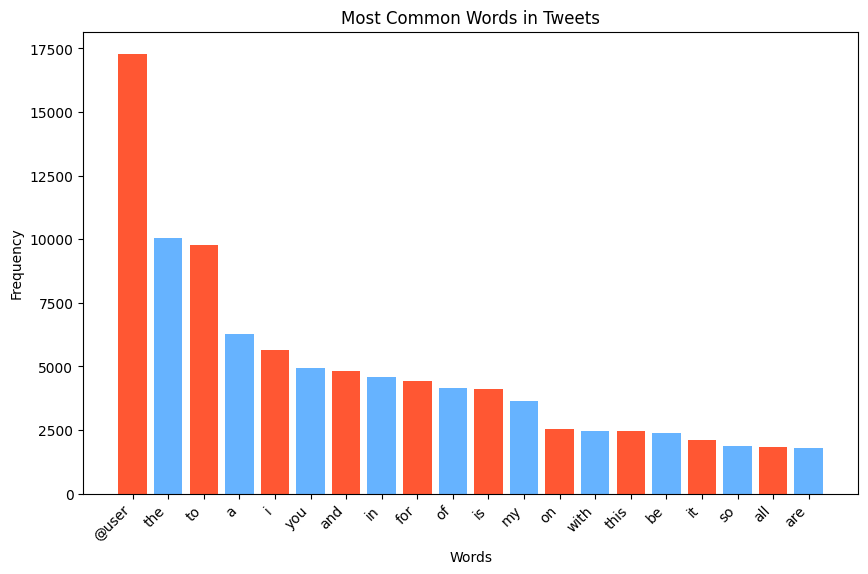

In [ ]:
# Tokenize tweets
tokens = ' '.join(data['tweet']).split()

# Count word frequencies
word_freq = Counter(tokens)

# Plot most common words
plt.figure(figsize=(10, 6))
common_words = word_freq.most_common(20)
words, freq = zip(*common_words)
plt.bar(words, freq, color=['#FF5733', '#66b3ff'])
plt.title('Most Common Words in Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Text Classification
# Vectorize tweets
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [ ]:
# Train SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_vec, y)

SVC(kernel='linear', probability=True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
y_pred_train = clf.predict(X_vec)
print(classification_report(y, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     29720
         1.0       0.99      0.74      0.84      2242

    accuracy                           0.98     31962
   macro avg       0.98      0.87      0.92     31962
weighted avg       0.98      0.98      0.98     31962



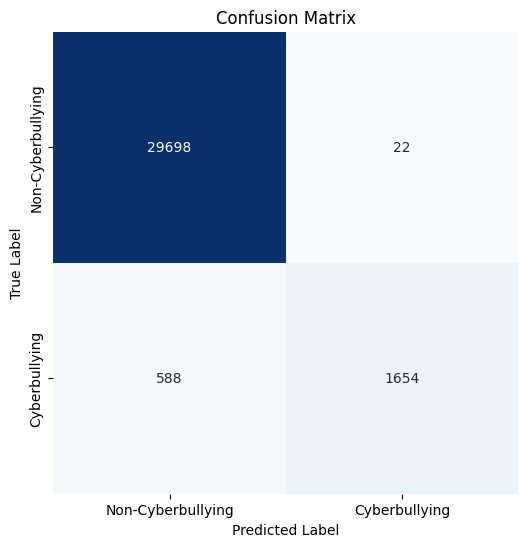

Accuracy: 0.9809148363681872


In [ ]:
# Model Evaluation
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y, y_pred_train)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Cyberbullying', 'Cyberbullying'],
            yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate accuracy
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy}')



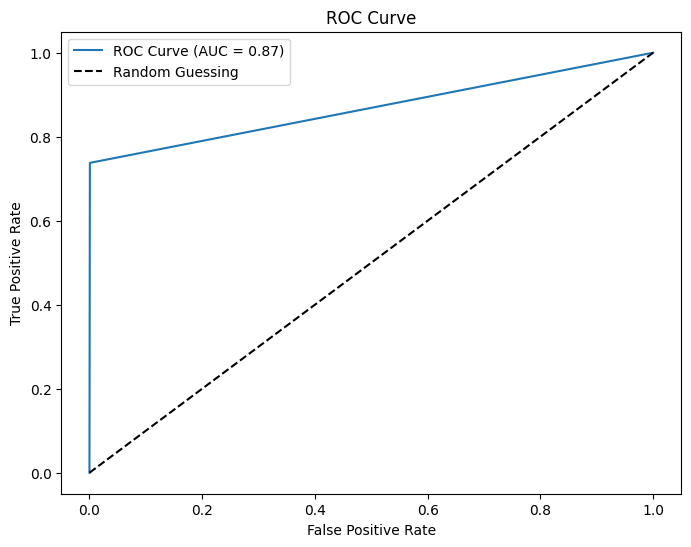

In [ ]:
# Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_pred_train)
auc = roc_auc_score(y, y_pred_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Text Input Widget for Prediction
tweet_input = widgets.Textarea(
    value='',
    placeholder='Type your tweet here...',
    description='Tweet:',
    disabled=False
)

# Button Widget for Triggering Prediction
button = widgets.Button(description="Detect Cyberbullying")

# Output Widget for Displaying Prediction Results
output = widgets.Output()

# Function to detect cyberbullying
def detect_cyberbullying(b):
    with output:
        output.clear_output()
        tweet = tweet_input.value
        cleaned_tweet = re.sub(r'http\S+|www\S+|[^a-zA-Z\s]', '', tweet)
        cleaned_tweet = cleaned_tweet.lower()
        tweet_vec = vectorizer.transform([cleaned_tweet])
        prediction = clf.predict(tweet_vec)[0]
        if prediction == 1:
            print("The tweet is classified as cyberbullying.")
        else:
            print("The tweet is not classified as cyberbullying.")

# Attach click event to button
button.on_click(detect_cyberbullying)

# Display widgets
display(tweet_input, button, output)

Textarea(value='', description='Tweet:', placeholder='Type your tweet here...')

Button(description='Detect Cyberbullying', style=ButtonStyle())

Output()